# CS5720 - Home Assignment 2
**University of Central Missouri**  
**Neural Networks and Deep Learning - Summer 2025**  
**Student Name: Tharaka Jagarlamudi | Student ID: 700770826**

This notebook covers:
- Convolution Operations with Different Parameters
- CNN Feature Extraction with Filters and Pooling
- Data Preprocessing: Normalization vs Standardization

In [2]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
import cv2
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

## Q1: Convolution with Different Parameters

In [3]:
# Define 5x5 Input and 3x3 Kernel
input_matrix = np.array([[1, 2, 3, 0, 1],
                         [0, 1, 2, 3, 1],
                         [1, 0, 1, 2, 2],
                         [2, 1, 0, 1, 1],
                         [0, 1, 2, 1, 0]], dtype=np.float32)
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]], dtype=np.float32)

input_tensor = tf.constant(input_matrix.reshape(1, 5, 5, 1))
kernel_tensor = tf.constant(kernel.reshape(3, 3, 1, 1))

for stride in [1, 2]:
    for padding in ['VALID', 'SAME']:
        conv_result = tf.nn.conv2d(input_tensor, kernel_tensor, strides=[1, stride, stride, 1], padding=padding)
        print(f"Stride={stride}, Padding={padding}\n", tf.squeeze(conv_result).numpy())

Stride=1, Padding=VALID
 [[-4. -2.  2.]
 [ 0. -4. -1.]
 [ 0. -2.  0.]]
Stride=1, Padding=SAME
 [[-3. -4.  0.  3.  3.]
 [-3. -4. -2.  2.  5.]
 [-2.  0. -4. -1.  6.]
 [-2.  0. -2.  0.  4.]
 [-2.  0.  0.  1.  2.]]
Stride=2, Padding=VALID
 [[-4.  2.]
 [ 0.  0.]]
Stride=2, Padding=SAME
 [[-3.  0.  3.]
 [-2. -4.  6.]
 [-2.  0.  2.]]


## Q2: CNN Feature Extraction - Edge Detection

In [4]:
# Upload Image Manually in Colab if needed
from google.colab import files
uploaded = files.upload()

Saving dog.jpg to dog.jpg


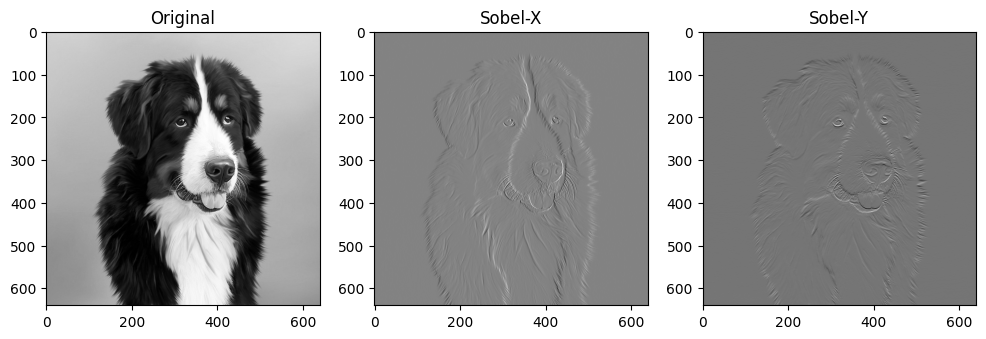

In [5]:
# Apply Sobel Filters
image = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(image, cmap='gray'); plt.title("Original")
plt.subplot(1,3,2); plt.imshow(sobel_x, cmap='gray'); plt.title("Sobel-X")
plt.subplot(1,3,3); plt.imshow(sobel_y, cmap='gray'); plt.title("Sobel-Y")
plt.show()

## Q2: CNN Feature Extraction - Pooling

In [6]:
# Max and Average Pooling
input_matrix = np.random.rand(1, 4, 4, 1).astype(np.float32)
max_pool = tf.nn.max_pool2d(input_matrix, ksize=2, strides=2, padding='VALID')
avg_pool = tf.nn.avg_pool2d(input_matrix, ksize=2, strides=2, padding='VALID')
print("Original:\n", tf.squeeze(input_matrix).numpy())
print("Max Pooled:\n", tf.squeeze(max_pool).numpy())
print("Avg Pooled:\n", tf.squeeze(avg_pool).numpy())

Original:
 [[0.98457026 0.14116737 0.50885296 0.31293595]
 [0.86852074 0.06216919 0.78604496 0.9973473 ]
 [0.69666946 0.20366459 0.05337072 0.19806486]
 [0.48129213 0.2070772  0.93437755 0.4929711 ]]
Max Pooled:
 [[0.98457026 0.9973473 ]
 [0.69666946 0.93437755]]
Avg Pooled:
 [[0.51410687 0.6512953 ]
 [0.39717585 0.41969606]]


## Q3: Data Preprocessing – Normalization vs. Standardization

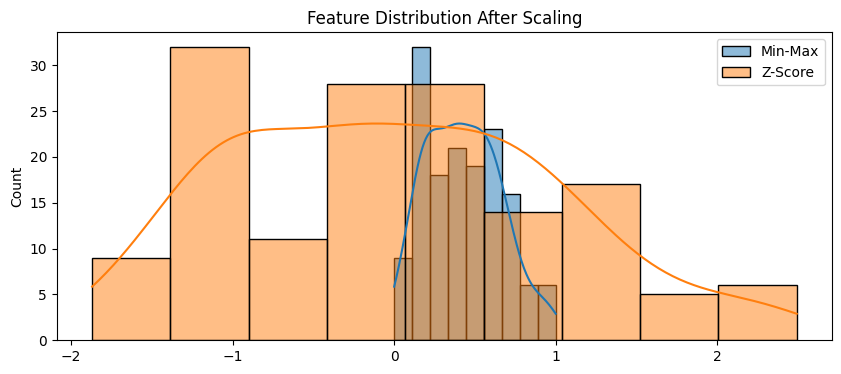

In [7]:
# Load and Transform Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target

# Min-Max Normalization
minmax = MinMaxScaler().fit_transform(X)
# Z-score Standardization
zscore = StandardScaler().fit_transform(X)

# Visualize
plt.figure(figsize=(10,4))
sns.histplot(minmax[:, 0], kde=True, label='Min-Max')
sns.histplot(zscore[:, 0], kde=True, label='Z-Score')
plt.legend(); plt.title("Feature Distribution After Scaling")
plt.show()

In [8]:
# Train Logistic Regression and Compare Accuracy
for name, X_trans in zip(['Raw', 'MinMax', 'ZScore'], [X, minmax, zscore]):
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"{name} Accuracy: {acc:.4f}")

Raw Accuracy: 1.0000
MinMax Accuracy: 0.9111
ZScore Accuracy: 1.0000


In [ ]:
In deep learning, standardization is usually more effective than normalization because it centers and scales data, leading to faster convergence and better training stability.
Normalization is still preferred for specific models like CNNs on image data, but standardization works well for most feedforward and recurrent neural networ